# Using TubeInflation

In [1]:
import pymecht as pmt
import numpy as np

## Definition of the material model

In [2]:
mat1 = pmt.MatModel('yeoh')
print(mat1.parameters) # Returns parameters as a dictionary

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
c1_0              1.00        No          1.00e-04    1.00e+02    
c2_0              1.00        No          0.00        1.00e+02    
c3_0              1.00        No          0.00        1.00e+02    
c4_0              0.00        No          0.00        1.00e+02    
------------------------------------------------------------------



In [3]:
print(mat1.parameters['c1_0'])
type(mat1.parameters['c1_0'])

1.00        No          1.00e-04    1.00e+02    


pymecht.ParamDict.Param

Combine two materials

In [4]:
mat2 = pmt.GOH()
model = pmt.MatModel('Yeoh',mat2)

# model = pmt.MatModel(mat1,mat2) #Another way to combine two materials 

Define fiber directions

In [5]:
# model.models[0].fiber_dirs = [np.array([0,cos(0.1),sin(0.1)]),np.array([0,cos(-0.1),sin(-0.1)])] #Attributes fiber directions to the first material 
model.models[1].fiber_dirs = [np.array([0,np.cos(0.1),np.sin(0.1)]),np.array([0,np.cos(-0.1),np.sin(-0.1)])] #Attributes fiber directions to the second material 

In [6]:
model.parameters 
#parameters with index 0 correspond to the first material in model #parameters with index 1 correspond to the second

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
c1_0              1.00        No          1.00e-04    1.00e+02    
c2_0              1.00        No          0.00        1.00e+02    
c3_0              1.00        No          0.00        1.00e+02    
c4_0              0.00        No          0.00        1.00e+02    
k1_1              10.00       No          0.10        30.00       
k2_1              10.00       No          0.10        30.00       
k3_1              0.10        No          0.00        0.33        
------------------------------------------------------------------

## Sample & parameter definition

In [7]:
sample = pmt.TubeInflation(model, force_measure='pressure')
print(sample)
params = sample.parameters
params #Additional sample parameters are added to the dictionnary

An object of type TubeInflationwith radius as input, pressure as output, and the following material
Material model with 2 components:
Component1: YEOH
Component2: GOH with fiber direction(s):[array([0.        , 0.99500417, 0.09983342]), array([ 0.        ,  0.99500417, -0.09983342])]



------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                1.00        No          0.50        1.50        
thick             0.10        No          0.00        1.00        
omega             0.00        No          0.00        0.00        
L0                1.00        No          1.00        1.00        
lambdaZ           1.00        No          1.00        1.00        
c1_0              1.00        No          1.00e-04    1.00e+02    
c2_0              1.00        No          0.00        1.00e+02    
c3_0              1.00        No          0.00        1.00e+02    
c4_0              0.00        No          0.00        1.00e+02    
k1_1              10.00       No          0.10        30.00       
k2_1              10.00       No          0.10        30.00       
k3_1              0.10        No          0.00        0.33    

Set parameters to a specific value

In [8]:
params.set('Ri', 9) 
params.set('thick', 2)
params.set('omega', 0)
params.set('L0', 1)
params.set('lambdaZ', 1)
params.set('c1_0', 28)
params.set('c2_0', 21)
params.set('c3_0', 8)
params.set('c4_0', 1)
params.set('k1_1',5.)
params.set('k2_1',15)
params.set('k3_1',0.1)
params

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                9.00        No          0.50        1.50        
thick             2.00        No          0.00        1.00        
omega             0.00        No          0.00        0.00        
L0                1.00        No          1.00        1.00        
lambdaZ           1.00        No          1.00        1.00        
c1_0              28.00       No          1.00e-04    1.00e+02    
c2_0              21.00       No          0.00        1.00e+02    
c3_0              8.00        No          0.00        1.00e+02    
c4_0              1.00        No          0.00        1.00e+02    
k1_1              5.00        No          0.10        30.00       
k2_1              15.00       No          0.10        30.00       
k3_1              0.10        No          0.00        0.33    

Fix parameters

In [9]:
params.fix('Ri')
params.fix('thick')
params.fix('omega')
params.fix('L0')
params.fix('lambdaZ')
params

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                9.00        Yes         -           -           
thick             2.00        Yes         -           -           
omega             0.00        Yes         -           -           
L0                1.00        Yes         -           -           
lambdaZ           1.00        Yes         -           -           
c1_0              28.00       No          1.00e-04    1.00e+02    
c2_0              21.00       No          0.00        1.00e+02    
c3_0              8.00        No          0.00        1.00e+02    
c4_0              1.00        No          0.00        1.00e+02    
k1_1              5.00        No          0.10        30.00       
k2_1              15.00       No          0.10        30.00       
k3_1              0.10        No          0.00        0.33    

In [10]:
sample #Recaps the material model and sample created

An object of type TubeInflationwith radius as input, pressure as output, and the following material
Material model with 2 components:
Component1: YEOH
Component2: GOH with fiber direction(s):[array([0.        , 0.99500417, 0.09983342]), array([ 0.        ,  0.99500417, -0.09983342])]

## Run the test

Force control

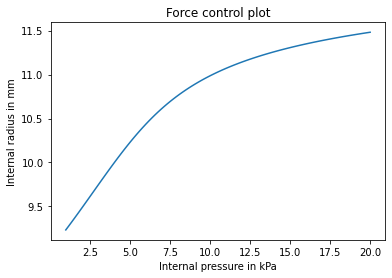

In [11]:
from matplotlib import pyplot as plt
inp = np.linspace(1,20,100)
plt.plot(inp,sample.force_controlled(inp,params)) 
plt.ylabel('Internal radius in mm')
plt.xlabel('Internal pressure in kPa')
plt.title('Force control plot')
plt.show()

Displacement control

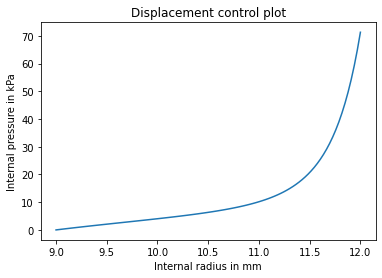

In [12]:
from matplotlib import pyplot as plt
inp = np.linspace(9,12,100)
plt.plot(inp,sample.disp_controlled(inp,params)) 
plt.ylabel('Internal pressure in kPa')
plt.xlabel('Internal radius in mm')
plt.title('Displacement control plot')
plt.show()

## Stress across the thickness for a given radius

In [13]:
xi,stress = sample.cauchy_stress([10], params)

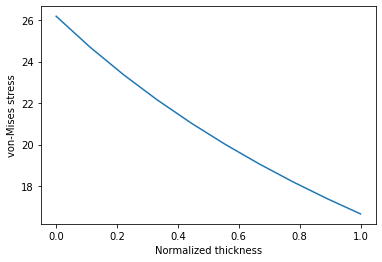

In [14]:
def von_mises(sigma_list):
    return [sqrt(3./2.)*np.linalg.norm(sigma-np.trace(sigma)/3.*np.eye(3)) for sigma in sigma_list]

plt.plot(xi,von_mises(stress))
plt.xlabel('Normalized thickness')
plt.ylabel('von-Mises stress')
plt.show()

## Least square fitting

In [15]:
applied_radius = np.linspace(9,12,20)
measured_pressure = np.linspace(0,10,20)
def sim_func(param):
    return sample.disp_controlled(applied_radius,param)

param_fitter = pmt.ParamFitter(sim_func,measured_pressure,params)

Parameter fitting instance created with the following settings
------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                9.00        Yes         -           -           
thick             2.00        Yes         -           -           
omega             0.00        Yes         -           -           
L0                1.00        Yes         -           -           
lambdaZ           1.00        Yes         -           -           
c1_0              28.00       No          1.00e-04    1.00e+02    
c2_0              21.00       No          0.00        1.00e+02    
c3_0              8.00        No          0.00        1.00e+02    
c4_0              1.00        No          0.00        1.00e+02    
k1_1              5.00        No          0.10        30.00       
k2_1              15.00       No          0.10        30.00       

In [16]:
res = param_fitter.fit()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8945e+03                                    4.42e+04    
       1              2         4.6330e+02      2.43e+03       4.43e+00       6.27e+03    
       2              3         6.7468e+01      3.96e+02       2.71e+00       8.98e+02    
       3              4         9.9442e+00      5.75e+01       1.56e+00       1.36e+02    
       4              5         1.7885e+00      8.16e+00       2.40e+00       2.46e+01    
       5              6         3.9911e-01      1.39e+00       1.77e+00       6.59e+00    
       6              7         1.7674e-01      2.22e-01       1.61e+00       2.88e+00    
       7              8         1.2535e-01      5.14e-02       3.49e+00       2.74e+00    
       8              9         9.6274e-02      2.91e-02       2.73e+00       1.69e+00    
       9             10         8.0910e-02      1.54e-02       2.60e+00       1.03e+00    

In [17]:
print(params)

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                9.00        Yes         -           -           
thick             2.00        Yes         -           -           
omega             0.00        Yes         -           -           
L0                1.00        Yes         -           -           
lambdaZ           1.00        Yes         -           -           
c1_0              13.37       No          1.00e-04    1.00e+02    
c2_0              1.16e-46    No          0.00        1.00e+02    
c3_0              4.30e-39    No          0.00        1.00e+02    
c4_0              3.50e-46    No          0.00        1.00e+02    
k1_1              30.00       No          0.10        30.00       
k2_1              0.10        No          0.10        30.00       
k3_1              0.14        No          0.00        0.33    

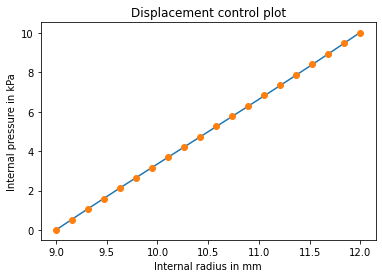

In [18]:

plt.plot(applied_radius,sample.disp_controlled(applied_radius,params)) 
plt.plot(applied_radius,measured_pressure,'o')
plt.ylabel('Internal pressure in kPa')
plt.xlabel('Internal radius in mm')
plt.title('Displacement control plot')
plt.show()
